In [37]:
import os
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import shutil
import pandas as pd
import math
import random
import time
import numpy as np
import torch
import multiprocessing as mp
# from xml.dom import minidom
import xml.etree.ElementTree as ET
import copy
%matplotlib inline

# from utils import util

data_path = 'data/20201229/'

In [4]:
data_list = os.listdir(data_path)
raw_list  = [d for d in data_list if d.endswith('raw')]
bmp_list  = [d for d in data_list if d.endswith('bmp')]
ext_list  = [d for d in data_list if d.endswith('EXT.bmp')]
res_list  = [d for d in data_list if d.endswith('RES.bmp')]
src_list  = [d for d in data_list if d.endswith('SRC.bmp')]
zero_list = [d for d in data_list if d.endswith('0.bmp') or d.endswith('1.bmp') or d.endswith('2.bmp') or d.endswith('3.bmp') or d.endswith('4.bmp')]

print(f'total: {len(data_list)}')
print(f'raw  : {len(raw_list)}')
print(f'bmp  : {len(bmp_list)}')
print(f'EXT  : {len(ext_list)}')
print(f'RES  : {len(res_list)}')
print(f'SRC  : {len(src_list)}')
print(f'0~4  : {len(zero_list)}')

print('missing one for both SRC and RES')

total: 2479
raw  : 1289
bmp  : 1186
EXT  : 297
RES  : 296
SRC  : 296
0~4  : 297
missing one for both SRC and RES


In [19]:
out_list = [d for d in data_list if (not d.endswith('0.bmp')) & (not d.endswith('SRC.bmp')) & (not d.endswith('RES.bmp')) & \
    (not d.endswith('EXT.bmp')) & (not d.endswith('.raw'))]

print('Spectial format:')
print(out_list)

Spectial format:
['20201229111301_1.bmp', '20201229124244_4.bmp', '20201229125631_4.bmp', '20201229164931_1.bmp', '20201229115232_4.bmp', '20201229131058_4.bmp', '20201229165506_4.bmp', '20201229114021_4.bmp', '20201229101110_1.bmp', '20201229131330_4.bmp', '20201229132040_4.bmp', '20201229164348_4.bmp', '20201229082312_4.bmp', '20201229082020_4.bmp', '20201229113138_4.bmp', '20201229130726_4.bmp', '20201229112102_1.bmp', '20201229123825_4.bmp', '20201229083543_4.bmp', '20201229105413_1.bmp', '20201229133459_1.bmp', '20201229113837_4.bmp', '20201229115425_1.bmp', '20201229123638_4.bmp', '20201229105756_4.bmp', '20201229112609_4.bmp', '20201229125445_1.bmp', '20201229100100_4.bmp', '20201229083242_1.bmp', '20201229134148_4.bmp', '20201229135138_4.bmp', '20201229133946_4.bmp', '20201229082619_4.bmp', '20201229125830_4.bmp', '20201229155011_1.bmp', '20201229165306_4.bmp']


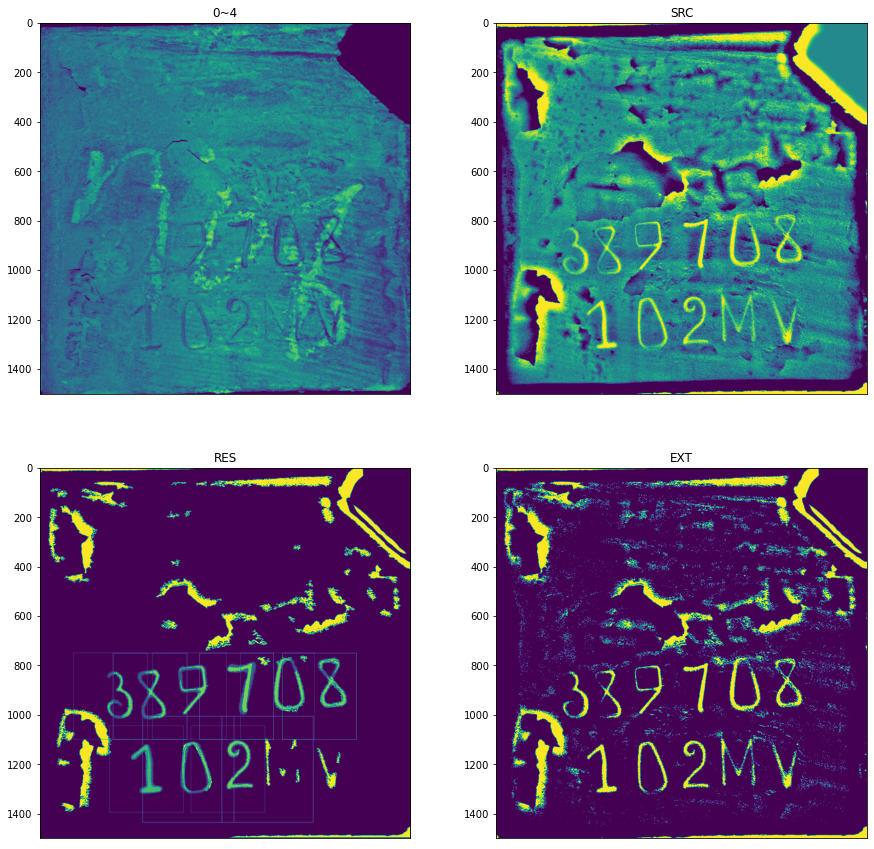

In [39]:
target = '20201229080315'
image_path = [[d for d in ext_list if d.startswith(target)][0], [d for d in res_list if d.startswith(target)][0], \
           [d for d in src_list if d.startswith(target)][0], [d for d in zero_list if d.startswith(target)][0]]

image_path = [os.path.join(data_path, d) for d in image_path]
image_name = ['EXT','RES','SRC','0~4']
image_name = image_name[::-1]

images = [cv.imread(d,0) for d in image_path]
images = images[::-1]
f, axs = plt.subplots(2,2)
f.set_figheight(15)
f.set_figwidth(15)

axs[0,0].imshow(images[0])
axs[0,0].set_title(image_name[0])
axs[0,0].set_xticks([])
axs[0,1].imshow(images[1])
axs[0,1].set_title(image_name[1])
axs[0,1].set_xticks([])
axs[1,0].imshow(images[2])
axs[1,0].set_title(image_name[2])
axs[1,0].set_xticks([])
axs[1,1].imshow(images[3])
axs[1,1].set_title(image_name[3])
axs[1,1].set_xticks([])
plt.show()

In [45]:
dir_name = [os.path.join(data_path,'EXT'), os.path.join(data_path,'RES'),os.path.join(data_path,'SRC'),os.path.join(data_path,'NUM')]
# _ = [os.mkdir(d) for d in dir_name if not os.path.exists(d)]
# ext_list  = [shutil.copyfile(os.path.join(data_path,d),os.path.join(dir_name[0],d)) for d in ext_list]
# res_list  = [shutil.copyfile(os.path.join(data_path,d),os.path.join(dir_name[1],d)) for d in res_list]
# src_list  = [shutil.copyfile(os.path.join(data_path,d),os.path.join(dir_name[2],d)) for d in src_list]
# zero_list = [shutil.copyfile(os.path.join(data_path,d),os.path.join(dir_name[3],d)) for d in zero_list]

In [59]:
ext_list  = [d for d in data_list if d.endswith('EXT.bmp')]
ext_list.sort()
df = pd.DataFrame(ext_list)
df.to_csv('20201229_EXT.csv', header=False)

In [81]:
df = pd.read_csv('20201229_EXT.csv')
print(df)

       0  20201229080315_0EXT.bmp  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0      1  20201229080446_0EXT.bmp         NaN         NaN         NaN   
1      2  20201229080615_0EXT.bmp         NaN         NaN         NaN   
2      3  20201229080743_0EXT.bmp         NaN         NaN         NaN   
3      4  20201229080901_0EXT.bmp         NaN         NaN         NaN   
4      5  20201229081106_0EXT.bmp         NaN         NaN         NaN   
..   ...                      ...         ...         ...         ...   
291  292  20201229175801_0EXT.bmp         NaN         NaN         NaN   
292  293  20201229175918_0EXT.bmp         NaN         NaN         NaN   
293  294  20201229180038_0EXT.bmp         NaN         NaN         NaN   
294  295  20201229180159_0EXT.bmp         NaN         NaN         NaN   
295  296  20201229180318_0EXT.bmp         NaN         NaN         NaN   

     Unnamed: 5  Unnamed: 6 Unnamed: 7  
0           NaN         NaN        NaN  
1           NaN         NaN        NaN  


# Note

0. 9 numbers + 0 char (3rd)
1. 9 numbers + 1 char (Most)
2. 9 numbers + 2 char (2nd)
3. 9 numbers + 3 char (few)
4. 8 numbers + 0 char (least)


In [86]:
df.columns = ['ID','file_name','GT','xmin','ymin','xmax','ymax','note']
df['note'].value_counts()

FALSE    18
Weird     2
Name: note, dtype: int64

In [90]:
clear_df = df[df['note'] != 'FALSE']
clear_df = clear_df[clear_df['note'] != 'Weird']
print(clear_df)
clear_df.drop('note', inplace=True, axis=1)
clear_df.to_csv('20201229_EXT_clear.csv')

      ID                file_name  GT  xmin  ymin  xmax  ymax note
0      1  20201229080446_0EXT.bmp NaN   NaN   NaN   NaN   NaN  NaN
1      2  20201229080615_0EXT.bmp NaN   NaN   NaN   NaN   NaN  NaN
2      3  20201229080743_0EXT.bmp NaN   NaN   NaN   NaN   NaN  NaN
3      4  20201229080901_0EXT.bmp NaN   NaN   NaN   NaN   NaN  NaN
4      5  20201229081106_0EXT.bmp NaN   NaN   NaN   NaN   NaN  NaN
..   ...                      ...  ..   ...   ...   ...   ...  ...
291  292  20201229175801_0EXT.bmp NaN   NaN   NaN   NaN   NaN  NaN
292  293  20201229175918_0EXT.bmp NaN   NaN   NaN   NaN   NaN  NaN
293  294  20201229180038_0EXT.bmp NaN   NaN   NaN   NaN   NaN  NaN
294  295  20201229180159_0EXT.bmp NaN   NaN   NaN   NaN   NaN  NaN
295  296  20201229180318_0EXT.bmp NaN   NaN   NaN   NaN   NaN  NaN

[276 rows x 8 columns]


In [3]:
clear_df = pd.read_csv('20201229_EXT_clear.csv')
clear_df

ID                file_name          GT  xmin  ymin  xmax  ymax
0      1  20201229080446_0EXT.bmp  389708207V   257   553  1318  1143
1      2  20201229080615_0EXT.bmp  389708507V   172   401  1302   953
2      3  20201229080743_0EXT.bmp  389708407V   178   404  1191   984
3      4  20201229080901_0EXT.bmp  389708305V   183   413  1208   960
4      5  20201229081106_0EXT.bmp  389708205V   280   564  1317  1137
..   ...                      ...         ...   ...   ...   ...   ...
271  292  20201229175801_0EXT.bmp  389177305V   200   649  1268  1110
272  293  20201229175918_0EXT.bmp  389177502V   145   563  1218  1017
273  294  20201229180038_0EXT.bmp  389177202V   174   603  1231  1197
274  295  20201229180159_0EXT.bmp  389177203V   198   603  1323  1186
275  296  20201229180318_0EXT.bmp  389177307V   163   572  1182  1010

[276 rows x 7 columns]

In [4]:
clear_name = clear_df['file_name'].tolist()

In [7]:
clear_name = [d[:-4] for d in clear_name]
print(len(clear_name))

276


In [7]:
xml_path = os.listdir(os.path.join(data_path,'EXT'))
xml_path.sort()
xml_path = [os.path.join(data_path, 'EXT', d) for d in xml_path if d.endswith('xml')]
print(len(xml_path))
print(xml_path[0])
# xml_path = [xml for xml in xml_path if xml[:-4] in clear_name]
# print(len(xml_path))
# xml_path = [os.path.join(data_path,'EXT',d) for d in xml_path if d.endswith('xml')]


284
data/20201229/EXT/20201229080315_0EXT.xml


In [35]:
def ymax2(ymax, ymin):
    return str(int(int(ymin) + (int(ymax) - int(ymin))/2))

In [43]:
tree = ET.parse(xml_path[0])
root = tree.getroot()

# modified the image size
width  = root.find('size').find('width')
height = root.find('size').find('height')
width.text = str(255)
height.text = str(255)

# modified the upper region cls name and locations
obj_u = root.find('object')
obj_u.find('name').text = 'Upper'
bndbox_u              = obj_u.find('bndbox')
locs                  = list(bndbox_u)
for loc in locs:
    loc.text = str(int(int(loc.text)*255./1500.))
obj_d = copy.deepcopy(obj_u)
root.append(obj_d)
obj_d = root[-1]
obj_d.find('name').text = 'Lower'
bndbox_d                   = obj_d.find('bndbox')
bndbox_d.find('ymin').text = ymax2(bndbox_d.find('ymax').text, bndbox_d.find('ymin').text)
bndbox_u.find('ymax').text = ymax2(bndbox_u.find('ymax').text, bndbox_u.find('ymin').text)

# write the modified xml
tree.write('/home/rico-li/Job/Feng_Hsin_steel/data/20201229/EXT/resize/new_annotation/test.xml')



In [57]:
def xml_modifier(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # modified the image size
    width  = root.find('size').find('width')
    height = root.find('size').find('height')
    width.text = str(255)
    height.text = str(255)

    # modified the upper region cls name and locations
    obj_u = root.find('object')
    obj_u.find('name').text = 'Upper'
    bndbox_u              = obj_u.find('bndbox')
    locs                  = list(bndbox_u)
    for loc in locs:
        loc.text = str(int(int(loc.text)*255./1500.))
    obj_d = copy.deepcopy(obj_u)
    root.append(obj_d)
    obj_d = root[-1]
    obj_d.find('name').text = 'Lower'
    bndbox_d                   = obj_d.find('bndbox')
    bndbox_d.find('ymin').text = ymax2(bndbox_d.find('ymax').text, bndbox_d.find('ymin').text)
    bndbox_u.find('ymax').text = ymax2(bndbox_u.find('ymax').text, bndbox_u.find('ymin').text)

    # write the modified xml
    tree.write(os.path.join('/home/rico-li/Job/Feng_Hsin_steel/data/20201229/EXT/resize/new_annotation', os.path.basename(xml_path)))


In [58]:
# ------------ new annotation for yolo ----------------

df = pd.read_csv('20201229_EXT_clear_2data_mode_resize.csv')
file_name = df['file_name'].tolist()
file_name = [d.split('.')[0]+'.xml' for d in file_name]

xml_paths = os.listdir(os.path.join(data_path,'EXT'))
xml_paths = [d for d in xml_paths if d in file_name]
xml_paths = [os.path.join(data_path, 'EXT', d) for d in xml_paths]

action = [xml_modifier(d) for d in xml_paths]


In [162]:
def xml_reader(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    kind = root.find('object').find('name').text
    loc  = list(root.find('object').find('bndbox'))
    loc  = [d.text for d in loc]
    return kind, loc[0], loc[1], loc[2], loc[3]

In [185]:
for i, xml in enumerate(xml_path):
    clear_df['GT'].iloc[i], clear_df['xmin'].iloc[i], clear_df['ymin'].iloc[i], clear_df['xmax'].iloc[i], clear_df['ymax'].iloc[i] = xml_reader(xml)

print(clear_df)


     Unnamed: 0  Unnamed: 0.1   ID                file_name          GT xmin  \
0             0             0    1  20201229080446_0EXT.bmp  389708207V  257   
1             1             1    2  20201229080615_0EXT.bmp  389708507V  172   
2             2             2    3  20201229080743_0EXT.bmp  389708407V  178   
3             3             3    4  20201229080901_0EXT.bmp  389708305V  183   
4             4             4    5  20201229081106_0EXT.bmp  389708205V  280   
..          ...           ...  ...                      ...         ...  ...   
271         271           291  292  20201229175801_0EXT.bmp  389177305V  200   
272         272           292  293  20201229175918_0EXT.bmp  389177502V  145   
273         273           293  294  20201229180038_0EXT.bmp  389177202V  174   
274         274           294  295  20201229180159_0EXT.bmp  389177203V  198   
275         275           295  296  20201229180318_0EXT.bmp  389177307V  163   

    ymin  xmax  ymax  
0    553  1318  

In [6]:
clear_df.to_csv('20201229_EXT_clear.csv', index=False)
print('saved')

saved


In [6]:
clear_df = pd.read_csv('20201229_EXT_clear.csv')
clear_df.head()

ID                file_name          GT  xmin  ymin  xmax  ymax
0   1  20201229080446_0EXT.bmp  389708207V   257   553  1318  1143
1   2  20201229080615_0EXT.bmp  389708507V   172   401  1302   953
2   3  20201229080743_0EXT.bmp  389708407V   178   404  1191   984
3   4  20201229080901_0EXT.bmp  389708305V   183   413  1208   960
4   5  20201229081106_0EXT.bmp  389708205V   280   564  1317  1137

In [7]:
GT = clear_df['GT'].tolist()
GT_1 = [d[:6] for d in GT]
GT_2 = [d[6:] for d in GT]
clear_df.drop('GT', inplace=True, axis=1)
clear_df.insert(2,'GT_1',GT_1,True)
clear_df.insert(3,'GT_2',GT_2,True)
print(clear_df.head())

   ID                file_name    GT_1  GT_2  xmin  ymin  xmax  ymax
0   1  20201229080446_0EXT.bmp  389708  207V   257   553  1318  1143
1   2  20201229080615_0EXT.bmp  389708  507V   172   401  1302   953
2   3  20201229080743_0EXT.bmp  389708  407V   178   404  1191   984
3   4  20201229080901_0EXT.bmp  389708  305V   183   413  1208   960
4   5  20201229081106_0EXT.bmp  389708  205V   280   564  1317  1137


In [11]:
ymin = clear_df['ymin'].tolist()
ymax_2 = clear_df['ymax'].tolist()
ymax_2 = [math.floor((d - ymin[i])/2 + ymin[i]) for i, d in enumerate(ymax_2)]
clear_df['ymax_2'] = ymax_2

print(clear_df.head())

   ID                file_name    GT_1  GT_2  xmin  ymin  xmax  ymax  ymax_2
0   1  20201229080446_0EXT.bmp  389708  207V   257   553  1318  1143     848
1   2  20201229080615_0EXT.bmp  389708  507V   172   401  1302   953     677
2   3  20201229080743_0EXT.bmp  389708  407V   178   404  1191   984     694
3   4  20201229080901_0EXT.bmp  389708  305V   183   413  1208   960     686
4   5  20201229081106_0EXT.bmp  389708  205V   280   564  1317  1137     850


In [12]:
clear_df.to_csv('20201229_EXT_clear_2data.csv', index=False)
print('saved')

saved


In [5]:
twoclear_df = pd.read_csv('20201229_EXT_clear_2data.csv')
print(twoclear_df.head())

   ID                file_name    GT_1  GT_2  xmin  ymin  xmax  ymax  ymax_2
0   1  20201229080446_0EXT.bmp  389708  207V   257   553  1318  1143     848
1   2  20201229080615_0EXT.bmp  389708  507V   172   401  1302   953     677
2   3  20201229080743_0EXT.bmp  389708  407V   178   404  1191   984     694
3   4  20201229080901_0EXT.bmp  389708  305V   183   413  1208   960     686
4   5  20201229081106_0EXT.bmp  389708  205V   280   564  1317  1137     850


In [17]:
# dataset splitting
def dataset_splitting(df, val_ratio:float, test_ratio:float):
    assert val_ratio + test_ratio < 1, 'the ratio sum cannot >= 1'
    data_len  = len(df.index)
    # 0: train
    # 1: val
    # 2: test
    mode_list = [0]*math.floor(data_len*(1-val_ratio-test_ratio)) + [1]*math.floor(data_len*(val_ratio)) + [2]*math.floor(data_len*(test_ratio))
    
    # to compensate the possible round off
    while len(mode_list) != data_len:
        mode_list.insert(0,0)
    # to produce the same result
    random.seed(10)
    random.shuffle(mode_list)
    
    df['mode'] = mode_list

    return df


In [21]:
df = pd.read_csv('20201229_EXT_clear_2data.csv')
new_df = dataset_splitting(df, 0.3, 0.1)
new_df.to_csv('20201229_EXT_clear_2data_mode.csv', index=False)

In [56]:
def img_resize(df, des_path:str, resize:tuple=(255,255)):
    img_paths = df['file_name'].tolist()
    img_paths = [os.path.join(data_path, 'EXT', d) for d in img_paths]
    
    img_resize = [cv.imread(img_path,0) for img_path in img_paths]
    img_resize = [cv.resize(img, resize, \
                  interpolation=cv.INTER_LINEAR) for img in img_resize]
    _ = [cv.imwrite(os.path.join(des_path,os.path.basename(img_paths[idk])), img) for idk, img in enumerate(img_resize)]

    print('Done')

In [57]:
img_resize(new_df, 'data/20201229/EXT/resize')

Done


In [63]:
new_df = pd.read_csv('20201229_EXT_clear_2data_mode.csv')
xmin, ymin = new_df['xmin'].tolist(), new_df['ymin'].tolist()
xmax, ymax = new_df['xmax'].tolist(), new_df['ymax'].tolist()
ymax2 = new_df['ymax_2'].tolist()

def xy_resize(xy:list):
    xy = [int(d*255/1500) for d in xy]
    return xy

xmin = xy_resize(xmin)
ymin = xy_resize(ymin)
xmax = xy_resize(xmax)
ymax = xy_resize(ymax)
ymax2 = xy_resize(ymax2)

new_df['xmin'], new_df['ymin'] = xmin, ymin
new_df['xmax'], new_df['ymax'] = xmax, ymax
new_df['ymax_2'] = ymax2

new_df.to_csv('20201229_EXT_clear_2data_mode_resize.csv', index=False)

In [170]:
def draw_anno(df, which, des_path:dir):
    '''
    To show the annotation of images
    parameters
        which: 
            0: the upper bbox to show
            1: the lower bbox to show
            2: show both
    '''
    
    if not os.path.exists(des_path):
        os.mkdir(des_path)
    img_paths   = df['file_name'].tolist()
    img_paths   = [os.path.join(data_path, 'EXT','resize', d) for d in img_paths]
    imgs        = [cv.imread(img_path,0) for img_path in img_paths]

    if which == 0:
        gt   = df['GT_1'].tolist()
        x1y1 = list(zip(df['xmin'].tolist(), df['ymin'].tolist()))
        x2y2 = list(zip(df['xmax'].tolist(), df['ymax_2'].tolist()))
    elif which == 1:
        gt   = df['GT_2'].tolist()
        x1y1 = list(zip(df['xmin'].tolist(), df['ymax_2'].tolist()))
        x2y2 = list(zip(df['xmax'].tolist(), df['ymax'].tolist()))
        text_ymax = df['ymax'].tolist()
        text_ymax = [d+40 for d in text_ymax]
        text = list(zip(df['xmin'].tolist(), text_ymax))
    else:
        gt_1   = df['GT_1'].tolist()
        gt_2   = df['GT_2'].tolist()
        x1y1_1 = list(zip(df['xmin'].tolist(), df['ymin'].tolist()))
        x2y2_1 = list(zip(df['xmax'].tolist(), df['ymax_2'].tolist()))
        x1y1_2 = list(zip(df['xmin'].tolist(), df['ymax_2'].tolist()))
        x2y2_2 = list(zip(df['xmax'].tolist(), df['ymax'].tolist()))
        text_ymax = df['ymax'].tolist()
        text_ymax = [d+40 for d in text_ymax]
        text = list(zip(df['xmin'].tolist(), text_ymax))
        
    color     = (255, 0, 0)
    thickness = 2
    fontScale = 1.5
    font       = cv.FONT_HERSHEY_SIMPLEX 
    if which in [0,1]:
        img_rec = [cv.rectangle(img, x1y1[idk], x2y2[idk], color, thickness)  for idk, img in enumerate(imgs)]
        if which == 0:
            img_rec = [cv.putText(img, str(gt[idk]), x1y1[idk], font, fontScale, color, thickness)\
                    for idk, img in enumerate(imgs)]
        else:
            img_rec = [cv.putText(img, str(gt[idk]), text[idk], font, fontScale, color, thickness)\
                    for idk, img in enumerate(imgs)]
        action  = [cv.imwrite(os.path.join(des_path,os.path.basename(img_paths[idk])), \
                    img) for idk, img in enumerate(img_rec)]
        print('Example:')
        plt.imshow(img_rec[0])
        plt.show()
    else:
        img_rec = [cv.rectangle(img, x1y1_1[idk], x2y2_1[idk], color, thickness)  for idk, img in enumerate(imgs)]
        img_rec = [cv.rectangle(img, x1y1_2[idk], x2y2_2[idk], color, thickness)  for idk, img in enumerate(img_rec)]
        img_rec = [cv.putText(img, str(gt_1[idk]), x1y1_1[idk], font, fontScale, color, thickness)\
             for idk, img in enumerate(imgs)]
        img_rec = [cv.putText(img, str(gt_2[idk]), text[idk], font, fontScale, color, thickness)\
             for idk, img in enumerate(imgs)]
        action  = [cv.imwrite(os.path.join(des_path,os.path.basename(img_paths[idk])), \
                    img) for idk, img in enumerate(img_rec)]
        print('Example:')
        plt.imshow(img_rec[0])
        plt.show()
    print(f'Output annotated files to {des_path}')

Example:


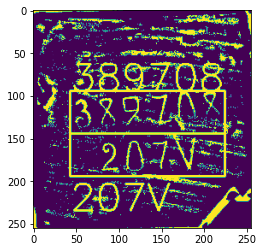

Output annotated files to data/20201229/EXT/annotated


In [171]:
draw_anno(new_df, which=2, des_path='data/20201229/EXT/annotated')

In [9]:
def pnet_traindata(df, mode, save_dir, which=0):
    neg_save_dir = os.path.join(save_dir, 'negative')
    pos_save_dir = os.path.join(save_dir, 'positive')
    par_save_dir = os.path.join(save_dir, 'part')
    if not os.path.exists(neg_save_dir):
        os.mkdir(neg_save_dir)
    if not os.path.exists(pos_save_dir):
        os.mkdir(pos_save_dir)
    if not os.path.exists(par_save_dir):
        os.mkdir(par_save_dir)

    # TODO
    modes = ['train','val','test']
    assert mode in modes, 'Select the modes'

    # pnet_weights = 'MTCNN/weights/pnet_Weights'

    anno_store_path = 'anno_store'
    if not os.path.exists(anno_store_path):
        os.mkdir(anno_store_path)
    fpos = open(os.path.join(anno_store_path, f'pos.txt'), 'w')
    fneg = open(os.path.join(anno_store_path, f'neg.txt'), 'w')
    fpar = open(os.path.join(anno_store_path, f'par.txt'), 'w')

    img_paths = df['file_name'].tolist()
    img_paths = [os.path.join(data_path, d) for d in img_paths]
    if which == 0:
        xmin, ymin = df['xmin'].tolist(), df['ymin'].tolist()
        xmax, ymax = df['xmax'].tolist(), df['ymax_2'].tolist()
    if which == 1:
        xmin, ymin = df['xmin'].tolist(), df['ymax_2'].tolist()
        xmax, ymax = df['xmax'].tolist(), df['ymax'].tolist()


    # index counts
    n_idx = 0 # negative
    p_idx = 0 # positive
    d_idx = 0 # dont care
    for idx, img_path in enumerate(img_paths):
        box = np.zeros((1,4), dtype=np.int32)
        box[0,0], box[0,1] = xmin[idx], ymin[idx]
        box[0,2], box[0,3] = xmax[idx], ymax[idx]
        
        img = cv.imread(img_path,0)
        h, w = img.shape

        # create negative samples (Iou < 0.3)
        # at least 35 negative samples per image
        neg_num = 0
        while neg_num < 35:
            size_x = np.random.randint(125, w)
            size_y = np.random.randint(20, h / 4)
            nx = np.random.randint(0, w - size_x)
            ny = np.random.randint(0, h - size_y)
            crop_box = np.array([nx, ny, nx + size_x, ny + size_y])

            Iou = util.IoU(crop_box, box)

            cropped_im = img[ny: ny + size_y, nx: nx + size_x]
            ng_resized_im = cv.resize(cropped_im, (125, 20), interpolation=cv.INTER_LINEAR)

            if np.max(Iou) < 0.3:
                # Iou with all gts must below 0.3
                save_file = os.path.join(neg_save_dir, "%s.bmp" % n_idx)
                fneg.write(save_file + ' 0\n')
                cv.imwrite(save_file, ng_resized_im)
                n_idx += 1
                neg_num += 1
        
        # generate positive and part samples
        # positive IoU >  0.65
        # part     IoU <= 0.4
        bw = box[0,2] - box[0,0]
        bh = box[0,3] - box[0,1]
        assert bw > 0
        assert bh > 0
        for _ in range(20):
            size_x = np.random.randint(int(min(bw, bh) * 0.8), np.ceil(1.25 * max(bw, bh)))
            size_y = np.random.randint(int(min(bw, bh) * 0.8), np.ceil(1.25 * max(bw, bh)))

            # delta here is the offset of box center
            delta_x = np.random.randint(-bw * 0.2, bw * 0.2)
            delta_y = np.random.randint(-bh * 0.2, bh * 0.2)

            nx1 = max(box[0,0] + bw / 2 + delta_x - size_x / 2, 0)
            ny1 = max(box[0,1] + bh / 2 + delta_y - size_y / 2, 0)
            nx2 = nx1 + size_x
            ny2 = ny1 + size_y

            # get up those outside the image
            if nx2 > w or ny2 > h:
                continue
            crop_box = np.array([nx1, ny1, nx2, ny2])

            offset_x1 = (box[0,0] - nx1) / float(size_x)
            offset_y1 = (box[0,1] - ny1) / float(size_y)
            offset_x2 = (box[0,2] - nx2) / float(size_x)
            offset_y2 = (box[0,3] - ny2) / float(size_y)

            cropped_im = img[int(ny1): int(ny2), int(nx1): int(nx2)]
            resized_im = cv.resize(cropped_im, (125, 20), interpolation=cv.INTER_LINEAR)

            if util.IoU(crop_box, box) >= 0.65:
                save_file = os.path.join(pos_save_dir, "%s.bmp" % p_idx)
                fpos.write(save_file + ' 1 %.2f %.2f %.2f %.2f\n' % (offset_x1, offset_y1, offset_x2, offset_y2))
                pos_resized_im = resized_im
                cv.imwrite(save_file, pos_resized_im)
                p_idx += 1
            elif util.IoU(crop_box, box) >= 0.4 and d_idx < 1.2*p_idx + 1:
                save_file = os.path.join(par_save_dir, "%s.bmp" % d_idx)
                fpar.write(save_file + ' -1 %.2f %.2f %.2f %.2f\n' % (offset_x1, offset_y1, offset_x2, offset_y2))
                par_resized_im = resized_im
                cv.imwrite(save_file, par_resized_im)
                d_idx += 1

        if idx % 50 == 0: 
            print("%s images done, pos: %s part: %s neg: %s" % (idx+1, p_idx, d_idx, n_idx))
        elif idx == len(img_paths)-1:
            print("%s images done, pos: %s part: %s neg: %s" % (idx+1, p_idx, d_idx, n_idx))

    fneg.close()
    fpar.close()
    fpos.close()

    print('\nExample Images:')
    f, axs = plt.subplots(2,3)
    f.set_figheight(10)
    f.set_figwidth(15)
    axs[0,0].imshow(img)
    axs[0,0].set_title('Original')
    axs[0,0].set_xticks([])
    axs[1,0].imshow(ng_resized_im)
    axs[1,0].set_title('Negative')
    axs[1,0].set_xticks([])
    axs[1,1].imshow(pos_resized_im)
    axs[1,1].set_title('Positive')
    axs[1,1].set_xticks([])
    axs[1,2].imshow(par_resized_im)
    axs[1,2].set_title('Part')
    axs[1,2].set_xticks([])
    f.tight_layout()
    plt.show()


    

1 images done, pos: 0 part: 1 neg: 35
51 images done, pos: 41 part: 51 neg: 1785
101 images done, pos: 71 part: 87 neg: 3535
151 images done, pos: 96 part: 116 neg: 5285
201 images done, pos: 132 part: 160 neg: 7035
251 images done, pos: 161 part: 195 neg: 8785
276 images done, pos: 177 part: 214 neg: 9660

Example Images:


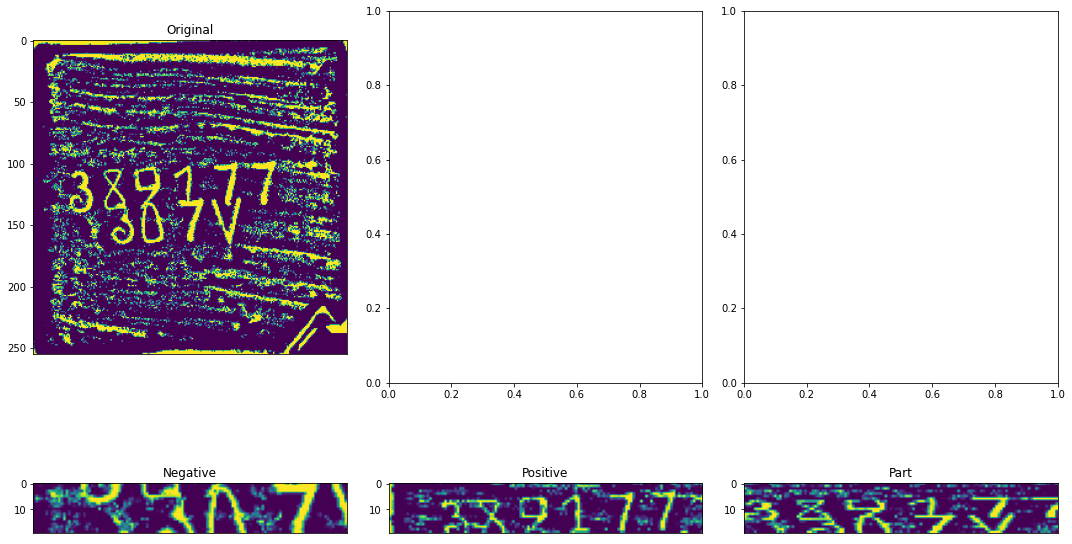

In [10]:
new_df = pd.read_csv('20201229_EXT_clear_2data_mode_resize.csv')
pnet_traindata(new_df, 'train', 'data/20201229/EXT/resize')

In [13]:
# image normalized
def normalize_img(df):
    img_paths = df['file_name'].tolist()
    img_paths = [os.path.join(data_path, d) for d in img_paths]
    
    img       = [cv.imread(d,0) for d in img_paths]
    mean_list = [np.mean(d) for d in img]
    mean      = np.sum(mean_list)/len(mean_list)
    return mean

In [14]:
mean = normalize_img(new_df)
print(mean)

37.73444912491851


In [23]:
def images2video(image_dir_path, output_name, fps, size):
    img_array = []
    filenames = os.listdir(image_dir_path)
    filenames.sort()
    filenames = [os.path.join(image_dir_path,filename) for filename in filenames if (filename.endswith('.bmp'))]
    for filename in filenames:
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)
    out = cv2.VideoWriter(f'{output_name}.avi', cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    
    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()

In [24]:
fps = 2
pred_path = '/home/rico-li/Job/Feng_Hsin_steel/evaluation/MTCNN'
images2video(image_dir_path=pred_path, output_name='MTCNN_eval', fps=fps, size=(255,255))

In [5]:
target = '20201229080315'
image_path = [d for d in ext_list if d.startswith(target)][0]
image_path = os.path.join(data_path, image_path)
image      = cv.imread(image_path,0)

im = image.astype(np.uint8)
morph = im.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

# apply Otsu threshold to each channel
_, open_close_ostu = cv2.threshold(morph, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)


# Gaussian Blur
gau = im.copy()
gau =  cv.GaussianBlur(gau,(5,5),0)


# OSTU only
ostu = im.copy()
ret2, ostu = cv.threshold(ostu,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


# apply gaussian after open/close
morph_gau =  cv.GaussianBlur(morph,(5,5),0)



# opencv denoising
dst = im.copy()
dst = cv.fastNlMeansDenoising(dst,None,10)

In [13]:
blob = im.copy()
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 1
params.maxThreshold = 255
params.filterByArea = True
params.minArea = 1
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(blob)
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(blob, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

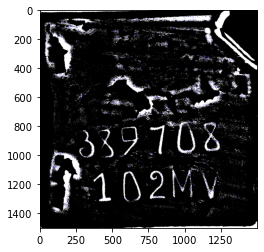

In [14]:
plt.imshow(im_with_keypoints)
plt.show()

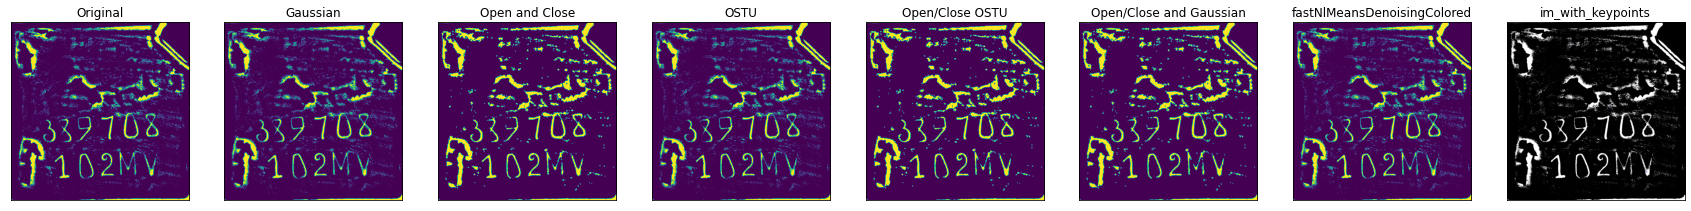

In [7]:
image_list = [image,        gau,        morph,          ostu,   open_close_ostu, morph_gau, dst, im_with_keypoints]
title_list = ['Original', 'Gaussian', 'Open and Close','OSTU', 'Open/Close OSTU', 'Open/Close and Gaussian', 'fastNlMeansDenoisingColored', 'im_with_keypoints']

f, axs = plt.subplots(1,len(title_list))
f.set_figheight(15)
f.set_figwidth(30)
for i in range(len(title_list)):
    axs[i].imshow(image_list[i])
    axs[i].set_title(title_list[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.show()

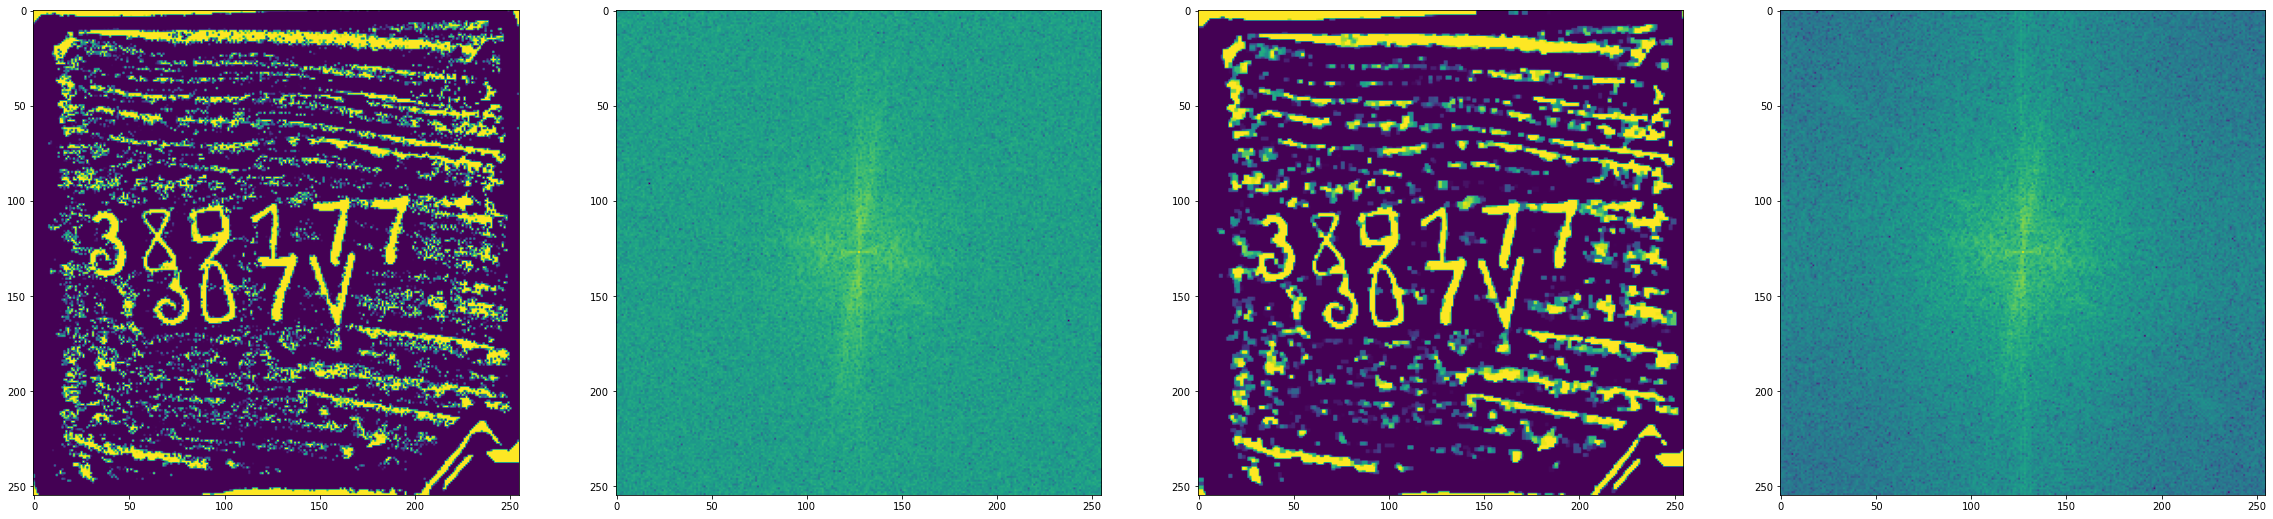

In [14]:
image_path = 'data/20201229/EXT/resize/20201229180318_0EXT.bmp'

img_src = cv2.imread(image_path,0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
morph  = cv2.morphologyEx(img_src, cv2.MORPH_CLOSE, kernel)
morph  = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

def dft(img_src):
    img_dft = cv2.dft(np.float32(img_src), flags = cv2.DFT_COMPLEX_OUTPUT)
    img_dft_shifted = np.fft.fftshift(img_dft)
    img_dft_log = 20*np.log(cv2.magnitude(img_dft_shifted[:,:,0],img_dft_shifted[:,:,1]))
    
    # mask
    rows, cols = img_src.shape
    crow, ccol = rows/2 , cols/2
    # create a mask first, center square is 1, remaining all zeros
    mask = np.ones((rows, cols,2), np.uint8)
    mask[int(crow-30):int(crow+30), int(ccol-30):int(ccol+30)] = 0
    # apply mask and inverse DFT
    img_dft_filtered = img_dft_shifted*mask
    

    img_dft_filtered_log = 20*np.log(cv2.magnitude(img_dft_filtered[:,:,0],img_dft_filtered[:,:,1]))
    img_dft_ishifted = np.fft.ifftshift(img_dft_filtered)
    img_idft = cv2.idft(img_dft_ishifted)
    img_idft = cv2.magnitude(img_idft[:,:,0],img_idft[:,:,1])
    return img_dft_log

img_dft_log = dft(img_src)
mor_dft_log = dft(morph)

f, axs = plt.subplots(1,4)
f.set_figheight(10)
f.set_figwidth(40)

axs[0].imshow(img_src)
axs[1].imshow(img_dft_log)
axs[2].imshow(morph)
axs[3].imshow(mor_dft_log)
plt.show()

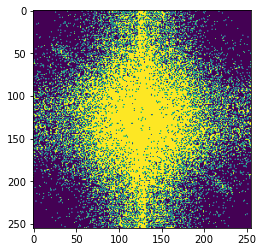

In [106]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

image_path = 'data/20201229/EXT/resize/20201229180318_0EXT.bmp'
img_src = cv2.imread(image_path,0)

img_dft         = cv2.dft(np.float32(morph), flags = cv2.DFT_COMPLEX_OUTPUT)
img_dft_shifted = np.fft.fftshift(img_dft)
img_dft_log     = 20*np.log(cv2.magnitude(img_dft_shifted[:,:,0],img_dft_shifted[:,:,1]))
img_dft_log     = img_dft_log.astype(np.uint8)

ret2, ostu = cv.threshold(img_dft_log,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(ostu)
plt.show()

In [132]:
def hough(img):
    h, w     = img.shape
    v_0, u_0 = int(h/2), int(w/2)

    # compute the theta
    theta = []
    for u in range(w):
        for v in range(h):
            if img[v, u] == 255:
                try:
                    ratio = (v-v_0)/(u-u_0)
                except:
                    theta.append(np.pi/2)
                if ratio > 0:
                    theta.append(np.arctan(ratio))
                elif ratio <0:
                    theta.append(np.pi + np.arctan(ratio))
            else:
                continue

    return theta


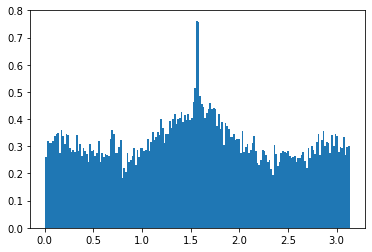

In [136]:
theta_list = hough(ostu)
theta_list = np.array(theta_list)
_ = plt.hist(theta_list, bins=180,density=True)

In [142]:
hist, bin_edges = np.histogram(theta_list, bins=180, density=True)
print(max(hist))
max_angle = [bin_edges[idx] for idx, count in enumerate(hist) if count == max(hist)]
print(max_angle)

0.7623534718029078
[1.5536981174065694]
